# Download mnist dataset


In [1]:
#Import the tensorflow.keras.datasets.mnist module so we can load the dataset
from tensorflow.keras.datasets import mnist

In [2]:
#Now load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the mnist dataset

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

# Visulise the dataset

In [7]:
#Import matplotlib
import matplotlib.pyplot as plt

In [8]:
#Import seaborn
import seaborn as sns

In [9]:
#Select the font scale
sns.set(font_scale=2)

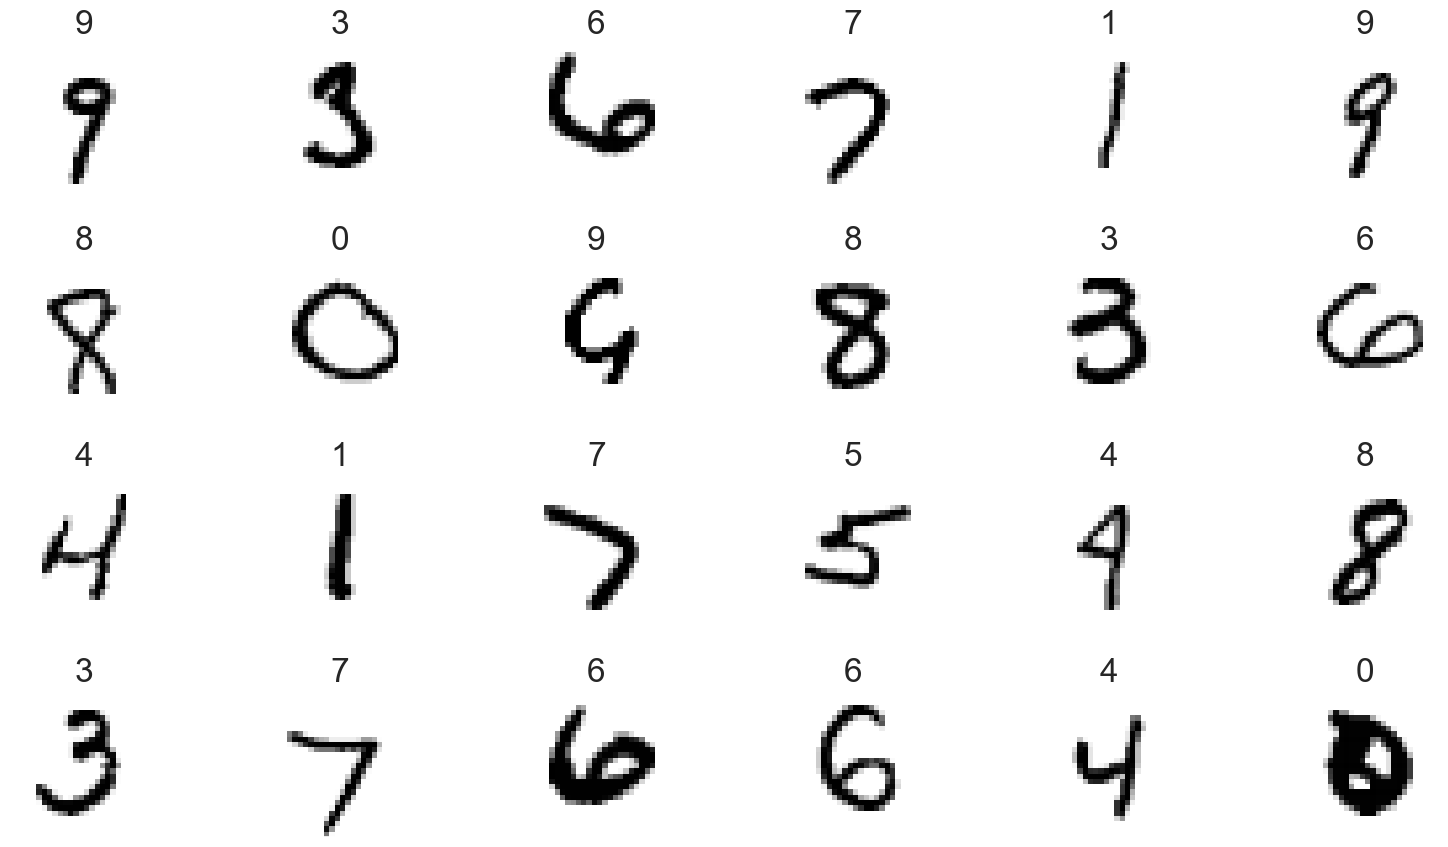

In [10]:
#Run this snippet multiple times to see additional randomly selected digits.
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

# Data Preparation
## Reshaping the Image Data

In [ ]:
#CNN require images to be in the shape (width, height, channels)
#Reshape the X_train dataset
#Why channels is 1 in this case, answer using another # line
X_train = X_train.reshape((60000, 28, 28, 1))

# channels is 1 because the images are grayscale, meaning they have only one color channel.

In [12]:
#Check the shape now, what has changed
X_train.shape

(60000, 28, 28, 1)

In [13]:
#Now do the same for X_test
X_test = X_test.reshape((10000, 28, 28, 1))

In [14]:
#Check the shape now
X_test.shape

(10000, 28, 28, 1)

# Normalizing the Image Data

In [ ]:
#Do you still remember what is normalisation?
#Write it here
#Now normalise the X_train
X_train = X_train.astype('float32') / 255

# normalisation is the process of scaling data to a specific range, often between 0 and 1, to improve the performance and stability of machine learning models.

In [16]:
#Do the same for X_test
X_test = X_test.astype('float32') / 255

# One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
y_test = to_categorical(y_test)
y_test.shape
#Explain what has changed and why using a new # line

#The labels have been converted from integers to one hot encoded vectors

(10000, 10)

# Creating the Neural Network

In [20]:
#Import sequential from keras models
from tensorflow.keras.models import Sequential
cnn = Sequential()

# Adding Layers to the Network

In [21]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Adding a Convolution Layer

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#Define activation function?
# activation function is a mathematical function used in neural networks to introduce non linearity, allowing the model to learn complex patterns in the data.

c:\Users\olive\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Dimensionality of the First Convolution Layer’s Output

# Adding a Pooling Layer

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#What is max pooling techanique and why it is used?
# Max pooling is a downsampling technique  to reduce the spatial dimensions of feature maps, which helps to decrease computational load and control overfitting.

# Adding Another Convolutional Layer and Pooling Layer

In [24]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the Results

In [25]:
cnn.add(Flatten())

# Adding a Dense Layer to Reduce the Number of Features

In [26]:
cnn.add(Dense(units=128, activation='relu'))

# Adding Another Dense Layer to Produce the Final Output

In [27]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the Model’s Summary

In [28]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

# Visualizing a Model’s Structure

In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
            show_layer_names=True)
Image(filename='convnet.png')

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

# Compiling the Model

In [31]:
cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Training and Evaluating the Model

In [32]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
              validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9587 - loss: 0.1402 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9887 - val_loss: 0.0365
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9878 - val_loss: 0.0430
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9939 - loss: 0.0198 - val_accuracy: 0.9872 - val_loss: 0.0450
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9917 - val_loss: 0.0318


# Evaluating the Model

In [33]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9904 - loss: 0.0295


In [34]:
loss

0.029479483142495155

In [35]:
accuracy

0.9904000163078308

# Making Predictions

In [36]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [37]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [38]:
for index, probability in enumerate(predictions[0]):
          print(f'{index}: {probability:.10%}')

0: 0.0000001023%
1: 0.0000000531%
2: 0.0000004764%
3: 0.0000005548%
4: 0.0000000000%
5: 0.0000000013%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000002446%
9: 0.0000004241%


# Locating the Incorrect Predictions

In [39]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [40]:
len(incorrect_predictions)

96

# Visualizing Incorrect Predictions

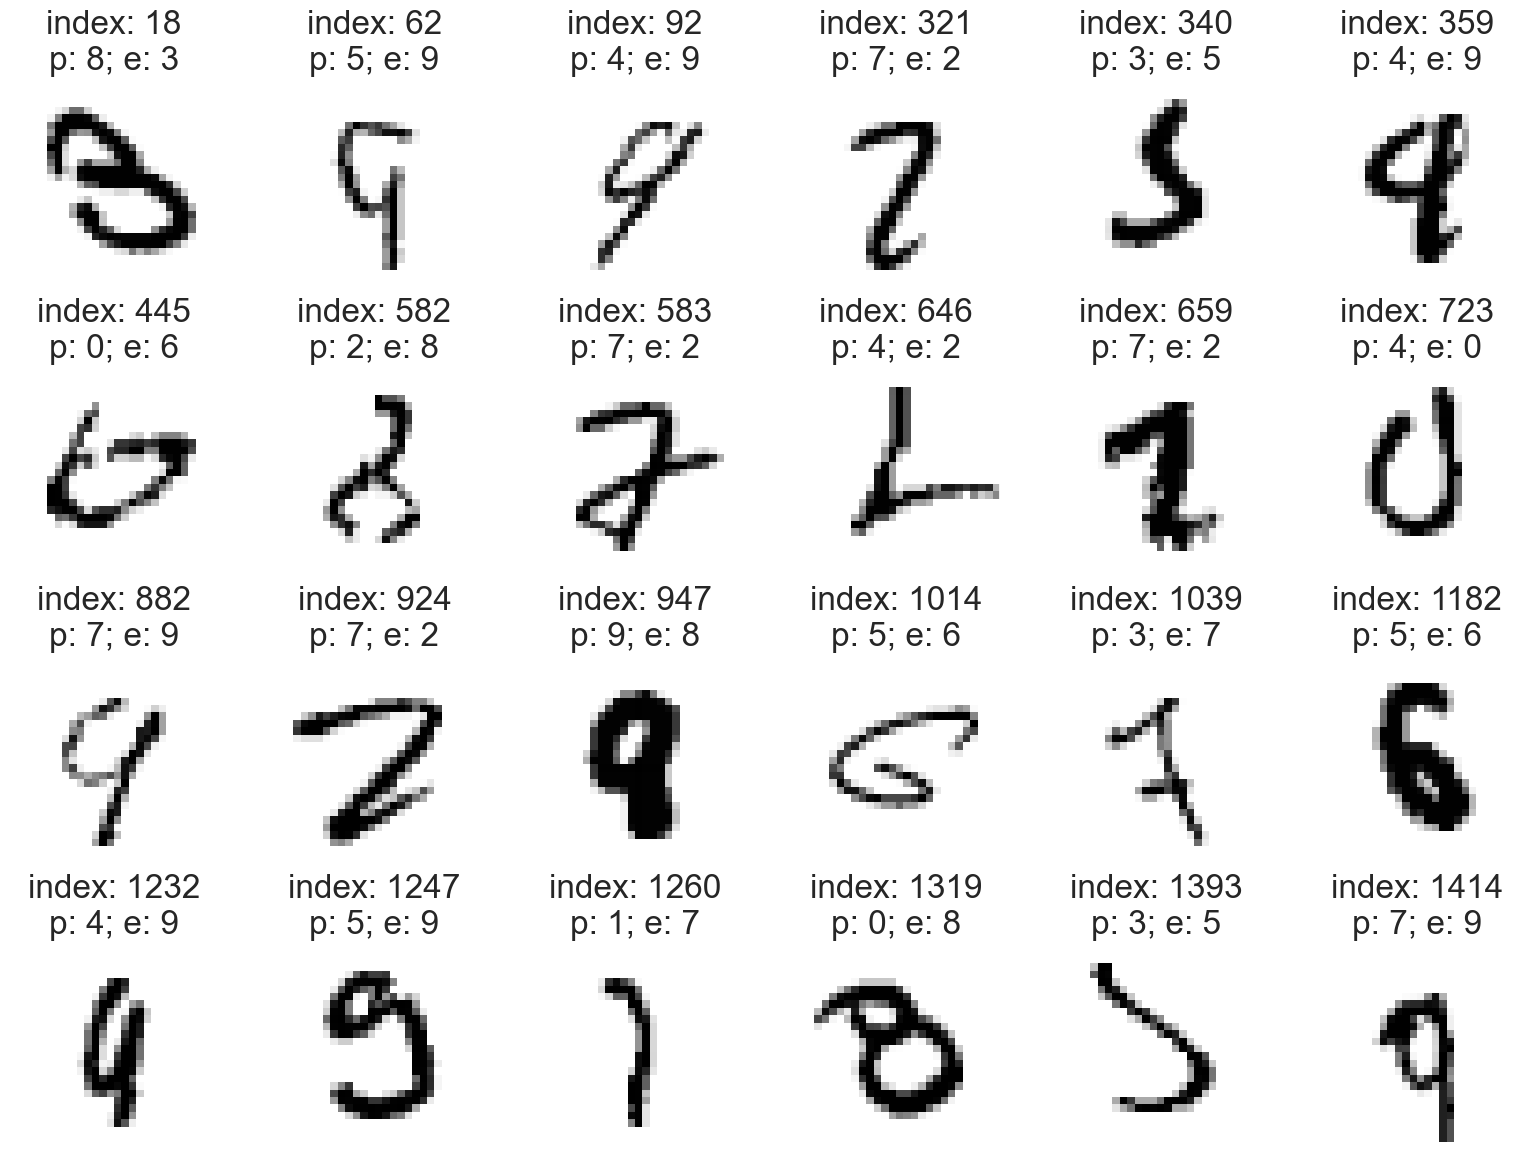

In [41]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

# Displaying the Probabilities for Several Incorrect Predictions

In [42]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')


In [43]:
display_probabilities(predictions[495])

0: 0.7382295560%
1: 0.0000001416%
2: 1.8804667518%
3: 0.0011355308%
4: 0.0010823754%
5: 0.0003149459%
6: 0.0982634607%
7: 0.0000000318%
8: 97.2799181938%
9: 0.0005884161%


In [44]:
display_probabilities(predictions[583])

0: 0.0000007201%
1: 0.0007507584%
2: 47.3595172167%
3: 0.1506226254%
4: 0.0000041608%
5: 0.0000000201%
6: 0.0000000235%
7: 52.4608194828%
8: 0.0282772438%
9: 0.0000001597%


# Saving and Loading a Model

In [45]:
#Save the model in a directory
!mkdir -p saved_model
cnn.save('saved_model/mnist_cnn.h5')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


In [46]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/model.h5



'ls' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# Load the model
from tensorflow.keras.models import load_model
cnn = load_model('saved_model/mnist_cnn.h5')
# Check its architecture
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,516 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)